#### 2.Frequency of each cluster

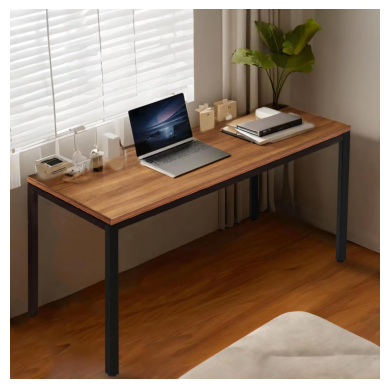

c:\Users\user\anaconda3\envs\ktteam5\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


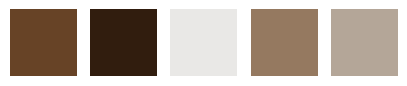

Ordered Dominant Colors:
 [[0.40629483 0.2634249  0.15120556]
 [0.1923055  0.11435528 0.05583149]
 [0.91421127 0.91059135 0.90325226]
 [0.58698819 0.4776706  0.37904331]
 [0.70953238 0.65461809 0.59624206]]
Percentage of each color (rounded):
 [33.62 24.69 15.72 14.02 11.96]


In [2]:
# 2.Frequency of each cluster
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import image as mp_image
from matplotlib import pyplot as plt

def extract_ordered_dominant_colors(image_path, num_colors):
    # Load and normalize image
    image = mp_image.imread(image_path) / 255.0
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors and labels
    colors = model.cluster_centers_
    labels = model.labels_
    
    # Count labels to find the frequency of each cluster
    count_labels = np.bincount(labels)
    total_pixels = len(pixels)
    
    # Calculate the percentage of each cluster
    percentages = 100 * count_labels / total_pixels
    percentages_rounded = np.round(percentages, 2)  # Round to 2 decimal places
    
    # Order the clusters by their frequency (most common first)
    ordered_indices = np.argsort(count_labels)[::-1]  # Descending order
    ordered_colors = colors[ordered_indices]
    ordered_percentages = percentages_rounded[ordered_indices]
    
    # Display the ordered dominant colors
    plt.figure(figsize=(num_colors, 2))
    for i, color in enumerate(ordered_colors):
        plt.subplot(1, num_colors, i+1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()
    
    return ordered_colors, ordered_percentages

# Use the function
ordered_dominant_colors, ordered_percentages = extract_ordered_dominant_colors('C:\\Users\\user\\amazon\\Detection\\team5\\Color_extraction\\test_images\\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg', num_colors=5)
print("Ordered Dominant Colors:\n", ordered_dominant_colors)
print("Percentage of each color (rounded):\n", ordered_percentages)
